# 외국인 방문객 데이터 분석

## 분석 개요
1. 2023-2024년 외국인 방문객 연령대 및 대륙별 변화 분석
2. 2017-2024년 외국인 방문객 성별 변화 분석  
3. 2010-2024년 외국인 방문객 수 및 대륙별 변화 분석

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rcParams
import warnings
import os

warnings.filterwarnings('ignore')

# 한글 폰트 설정 함수 (04_전체따릉이이용객반납장소.ipynb에서 가져옴)
def setup_korean_font():
    font_paths = [
        r'C:\Windows\Fonts\malgun.ttf',
        r'C:\Windows\Fonts\gulim.ttc',
        r'C:\Windows\Fonts\batang.ttc'
    ]
    
    for font_path in font_paths:
        if os.path.exists(font_path):
            try:
                korean_font = fm.FontProperties(fname=font_path)
                fm.fontManager.addfont(font_path)
                plt.rcParams['font.family'] = korean_font.get_name()
                plt.rcParams['axes.unicode_minus'] = False
                print(f'한글 폰트 설정: {korean_font.get_name()}')
                return korean_font
            except:
                continue
    
    # 폰트 파일이 없을 경우 시스템 폰트 사용
    try:
        plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.rcParams['axes.unicode_minus'] = False
        print('한글 폰트 설정: Malgun Gothic (시스템 폰트)')
        return None
    except:
        print('한글 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.')
        return None

# 한글 폰트 설정 실행
korean_font_prop = setup_korean_font()

# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print('라이브러리 로드 및 한글 폰트 설정 완료')


한글 폰트 설정: Malgun Gothic
라이브러리 로드 및 한글 폰트 설정 완료


## 1. 데이터 로드 및 전처리

In [62]:
# 데이터 파일 경로
file1 = '../방문객_연령별_대륙별_전국외국인_2023년~2024년.csv'
file2 = '../방문객_성별_전국외국인_2017년~2024년.csv'
file3 = '../방문객_대륙별_전국외국인_2010년~2024년.csv'

# 파일 1: 연령별 대륙별 데이터 (2023-2024)
df1 = pd.read_csv(file1, encoding='utf-8-sig')
print("=== 파일 1: 연령별 대륙별 데이터 (2023-2024) ===")
print(df1.head())
print(f"Shape: {df1.shape}")
print(f"Columns: {df1.columns.tolist()}")


=== 파일 1: 연령별 대륙별 데이터 (2023-2024) ===
   대륙별(1)  대륙별(2)      2023   2023.1   2023.2   2023.3   2023.4   2023.5  \
0  대륙별(1)  대륙별(2)        합계       합계       합계       합계       합계       합계   
1  대륙별(1)  대륙별(2)        소계    0~20세   21~30세   31~40세   41~50세   51~60세   
2      합계      소계  11031665  1141274  2789771  2267755  1617046  1349707   
3      합계    아시아주   8401391   840191  2283751  1809073  1254237   986313   
4      합계      미주   1373227   169550   225064   227481   190171   212947   

    2023.6  2023.7  ...  2024.1   2024.2   2024.3   2024.4   2024.5   2024.6  \
0       합계      합계  ...      합계       합계       합계       합계       합계       합계   
1   61세 이상     승무원  ...    0~9세   10~19세   20~29세   30~39세   40~49세   50~59세   
2  1110580  755532  ...  460426  1007061  3966890  3446258  2365782  1957080   
3   760088  467738  ...  352843   796676  3359778  2835393  1912513  1512619   
4   229425  118589  ...   71528   123082   266565   302690   238444   258418   

    2024.7  2024.8  2024

In [63]:
# 파일 2: 성별 데이터 (2017-2024)
df2 = pd.read_csv(file2, encoding='utf-8-sig')
print("\n=== 파일 2: 성별 데이터 (2017-2024) ===")
print(df2.head())
print(f"Shape: {df2.shape}")
print(f"Columns: {df2.columns.tolist()}")



=== 파일 2: 성별 데이터 (2017-2024) ===
   대륙별(1)  대륙별(2)      2017   2017.1   2017.2      2018   2018.1   2018.2  \
0  대륙별(1)  대륙별(2)         계       남자       여자         계       남자       여자   
1      합계      소계  13335758  5533199  6806301  15346879  6229185  8195792   
2      합계      일본   2311447   923587  1357010   2948527  1090814  1830546   
3      합계      미국    868881   456221   357389    967992   502298   407968   
4      합계      중국   4169353  1709407  2289364   4789512  1910231  2734297   

       2019   2019.1  ...  2021.2     2022   2022.1   2022.2      2023  \
0         계       남자  ...      여자        계       남자       여자         계   
1  17502756  6768303  ...  196694  3198017  1403186  1290033  11031665   
2   3271706  1125545  ...    5982   296867   119310   176019   2316429   
3   1044038   527605  ...   57396   543648   230052   224279   1086415   
4   6023021  2236402  ...   54244   227358    91941    87150   2019424   

    2023.1   2023.2      2024   2024.1   2024.2  
0       

In [64]:
# 파일 3: 대륙별 데이터 (2010-2024)
df3 = pd.read_csv(file3, encoding='utf-8-sig')
print("\n=== 파일 3: 대륙별 데이터 (2010-2024) ===")
print(df3.head())
print(f"Shape: {df3.shape}")
print(f"Columns: {df3.columns.tolist()}")



=== 파일 3: 대륙별 데이터 (2010-2024) ===
   대륙별(1)  대륙별(2)     2010     2011      2012      2013      2014      2015  \
0  대륙별(1)  대륙별(2)        계        계         계         계         계         계   
1      합계      소계  8797658  9794796  11140028  12175550  14201516  13231651   
2      합계      일본  3023009  3289051   3518792   2747750   2280434   1837782   
3      합계      미국   652889   661503    697866    722315    770305    767613   
4      합계      중국  1875157  2220196   2836892   4326869   6126865   5984170   

       2016      2017      2018      2019     2020    2021     2022      2023  \
0         계         계         계         계        계       계        계         계   
1  17241823  13335758  15346879  17502756  2519118  967003  3198017  11031665   
2   2297893   2311447   2948527   3271706   430742   15265   296867   2316429   
3    866186    868881    967992   1044038   220417  204025   543648   1086415   
4   8067722   4169353   4789512   6023021   686430  170215   227358   2019424   

   

## 2. 파일 1 분석: 2023-2024년 연령대별 및 대륙별 외국인 방문객 분석

In [65]:
# 파일 1 데이터 전처리
df1_clean = df1.copy()
df1_clean.columns = [col.replace('\ufeff', '') for col in df1_clean.columns]

# 컬럼명 정리
print("정리된 컬럼명:")
for i, col in enumerate(df1_clean.columns):
    print(f"{i}: {col}")

# 합계 행만 추출 (전체 데이터)
total_row = df1_clean[df1_clean.iloc[:, 0] == '합계'].copy()
print("\n=== 전체 합계 데이터 ===")
print(total_row)


정리된 컬럼명:
0: 대륙별(1)
1: 대륙별(2)
2: 2023
3: 2023.1
4: 2023.2
5: 2023.3
6: 2023.4
7: 2023.5
8: 2023.6
9: 2023.7
10: 2024
11: 2024.1
12: 2024.2
13: 2024.3
14: 2024.4
15: 2024.5
16: 2024.6
17: 2024.7
18: 2024.8
19: 2024.9
20: 2024.10

=== 전체 합계 데이터 ===
  대륙별(1) 대륙별(2)      2023   2023.1   2023.2   2023.3   2023.4   2023.5  \
2     합계     소계  11031665  1141274  2789771  2267755  1617046  1349707   
3     합계   아시아주   8401391   840191  2283751  1809073  1254237   986313   
4     합계     미주   1373227   169550   225064   227481   190171   212947   
5     합계     구주    918059    92883   219733   174616   121938   102162   
6     합계    대양주    240864    35590    47820    41720    37681    32966   
7     합계   아프리카     57253     3052    10101    11006     6614     3790   
8     합계     교포     40663        2     3271     3841     6368    11489   
9     합계     기타       208        6       31       18       37       40   

    2023.6  2023.7  ...  2024.1   2024.2   2024.3   2024.4   2024.5   2024.6  \
2  1110

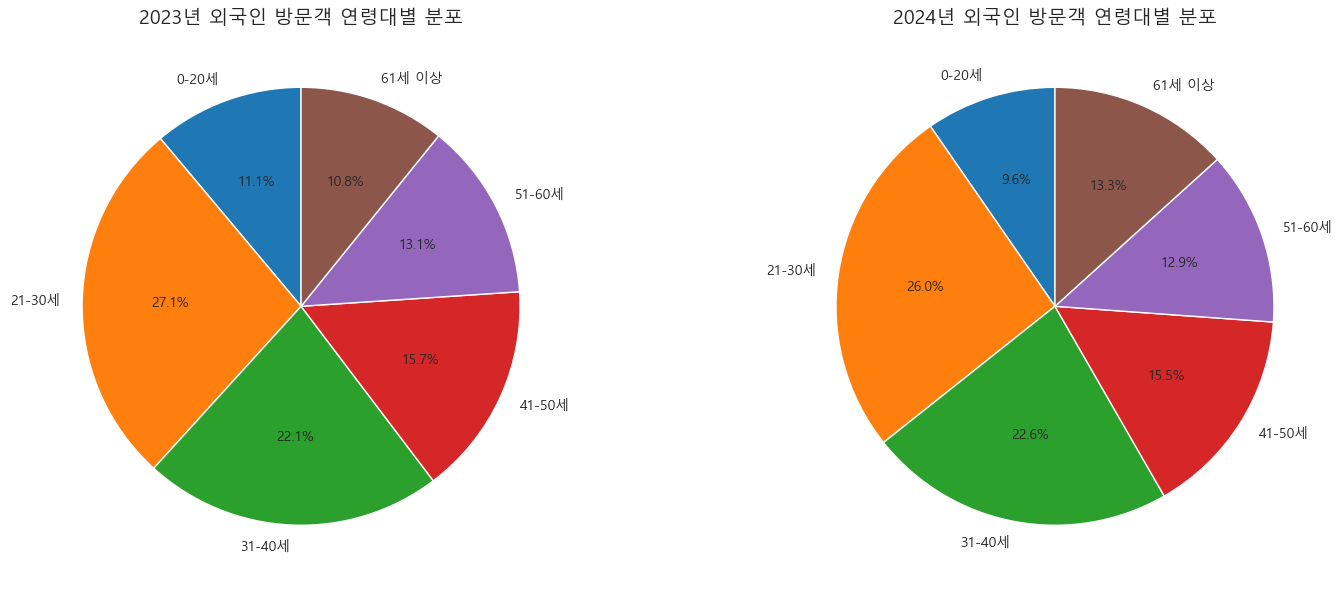

\n=== 2023-2024년 연령대별 변화 ===
              변화량     변화율(%)
0-20세    326213.0  28.583232
21-30세  1177119.0  42.194108
31-40세  1178503.0  51.967827
41-50세   748736.0  46.302703
51-60세   607373.0  45.000359
61세 이상   914343.0  82.330224


In [ ]:
# 2023년 연령대별 분석
age_2023 = {
    '0-20세': 1141274,
    '21-30세': 2789771, 
    '31-40세': 2267755,
    '41-50세': 1617046,
    '51-60세': 1349707,
    '61세 이상': 1110580
}

# 2024년 연령대별 분석 (세분화된 연령대를 통합)
age_2024 = {
    '0-20세': 460426 + 1007061,  # 0-9세 + 10-19세
    '21-30세': 3966890,  # 20-29세
    '31-40세': 3446258,  # 30-39세
    '41-50세': 2365782,  # 40-49세
    '51-60세': 1957080,  # 50-59세
    '61세 이상': 1399258 + 546954 + 78711  # 60-69세 + 70-79세 + 80세 이상
}

# 연령대별 비교 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 2023년 연령대별 분포
wedges1, texts1, autotexts1 = ax1.pie(age_2023.values(), labels=age_2023.keys(), autopct='%1.1f%%', startangle=90)
for text in texts1:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts1:
    autotext.set_fontproperties(korean_font_prop)
ax1.set_title('2023년 외국인 방문객 연령대별 분포', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')

# 2024년 연령대별 분포
wedges2, texts2, autotexts2 = ax2.pie(age_2024.values(), labels=age_2024.keys(), autopct='%1.1f%%', startangle=90)
for text in texts2:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts2:
    autotext.set_fontproperties(korean_font_prop)
ax2.set_title('2024년 외국인 방문객 연령대별 분포', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 연령대별 변화량 계산
age_change = {}
for age_group in age_2023.keys():
    change = age_2024[age_group] - age_2023[age_group]
    change_rate = (change / age_2023[age_group]) * 100
    age_change[age_group] = {'변화량': change, '변화율(%)': change_rate}
    
age_change_df = pd.DataFrame(age_change).T
print("\\n=== 2023-2024년 연령대별 변화 ===")
print(age_change_df)


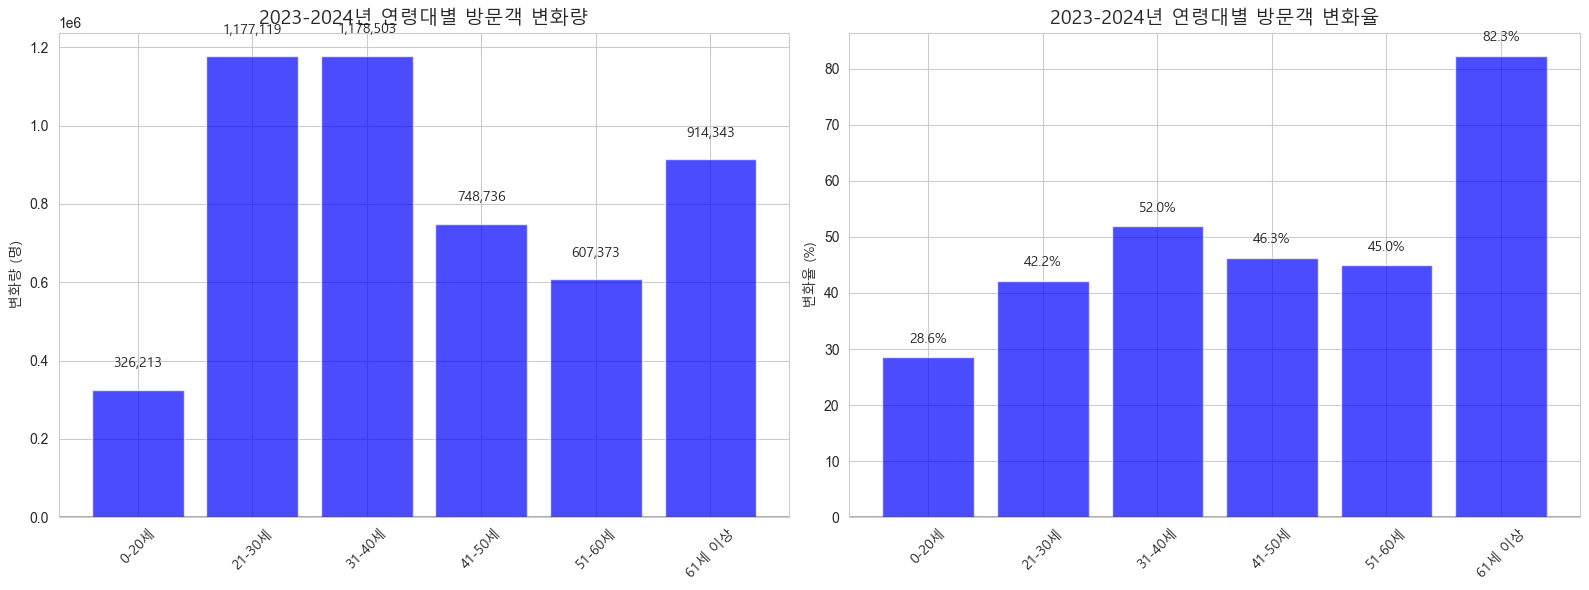

In [ ]:
# 연령대별 변화량 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 절대 변화량
colors = ['red' if x < 0 else 'blue' for x in age_change_df['변화량']]
bars1 = ax1.bar(age_change_df.index, age_change_df['변화량'], color=colors, alpha=0.7)
ax1.set_title('2023-2024년 연령대별 방문객 변화량', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax1.set_ylabel('변화량 (명)', fontproperties=korean_font_prop)
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# x축 레이블에 한글 폰트 적용
ax1.set_xticklabels(age_change_df.index, fontproperties=korean_font_prop)

# 막대 위에 값 표시
for bar, value in zip(bars1, age_change_df['변화량']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (50000 if height > 0 else -100000),
             f'{value:,.0f}', ha='center', va='bottom' if height > 0 else 'top', fontproperties=korean_font_prop)

# 변화율
colors2 = ['red' if x < 0 else 'blue' for x in age_change_df['변화율(%)']]
bars2 = ax2.bar(age_change_df.index, age_change_df['변화율(%)'], color=colors2, alpha=0.7)
ax2.set_title('2023-2024년 연령대별 방문객 변화율', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax2.set_ylabel('변화율 (%)', fontproperties=korean_font_prop)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# x축 레이블에 한글 폰트 적용
ax2.set_xticklabels(age_change_df.index, fontproperties=korean_font_prop)

# 막대 위에 값 표시
for bar, value in zip(bars2, age_change_df['변화율(%)']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (2 if height > 0 else -5),
             f'{value:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontproperties=korean_font_prop)

plt.tight_layout()
plt.show()


=== 2023-2024년 대륙별 방문객 변화 ===
         2023      2024      변화량     변화율(%)
아시아주  8401391  13113511  4712120  56.087379
미주    1373227   1719511   346284  25.216807
구주     918059   1140953   222894  24.278832
대양주    240864    289685    48821  20.269115
아프리카    57253     70758    13505  23.588284
교포      40663     34989    -5674 -13.953717


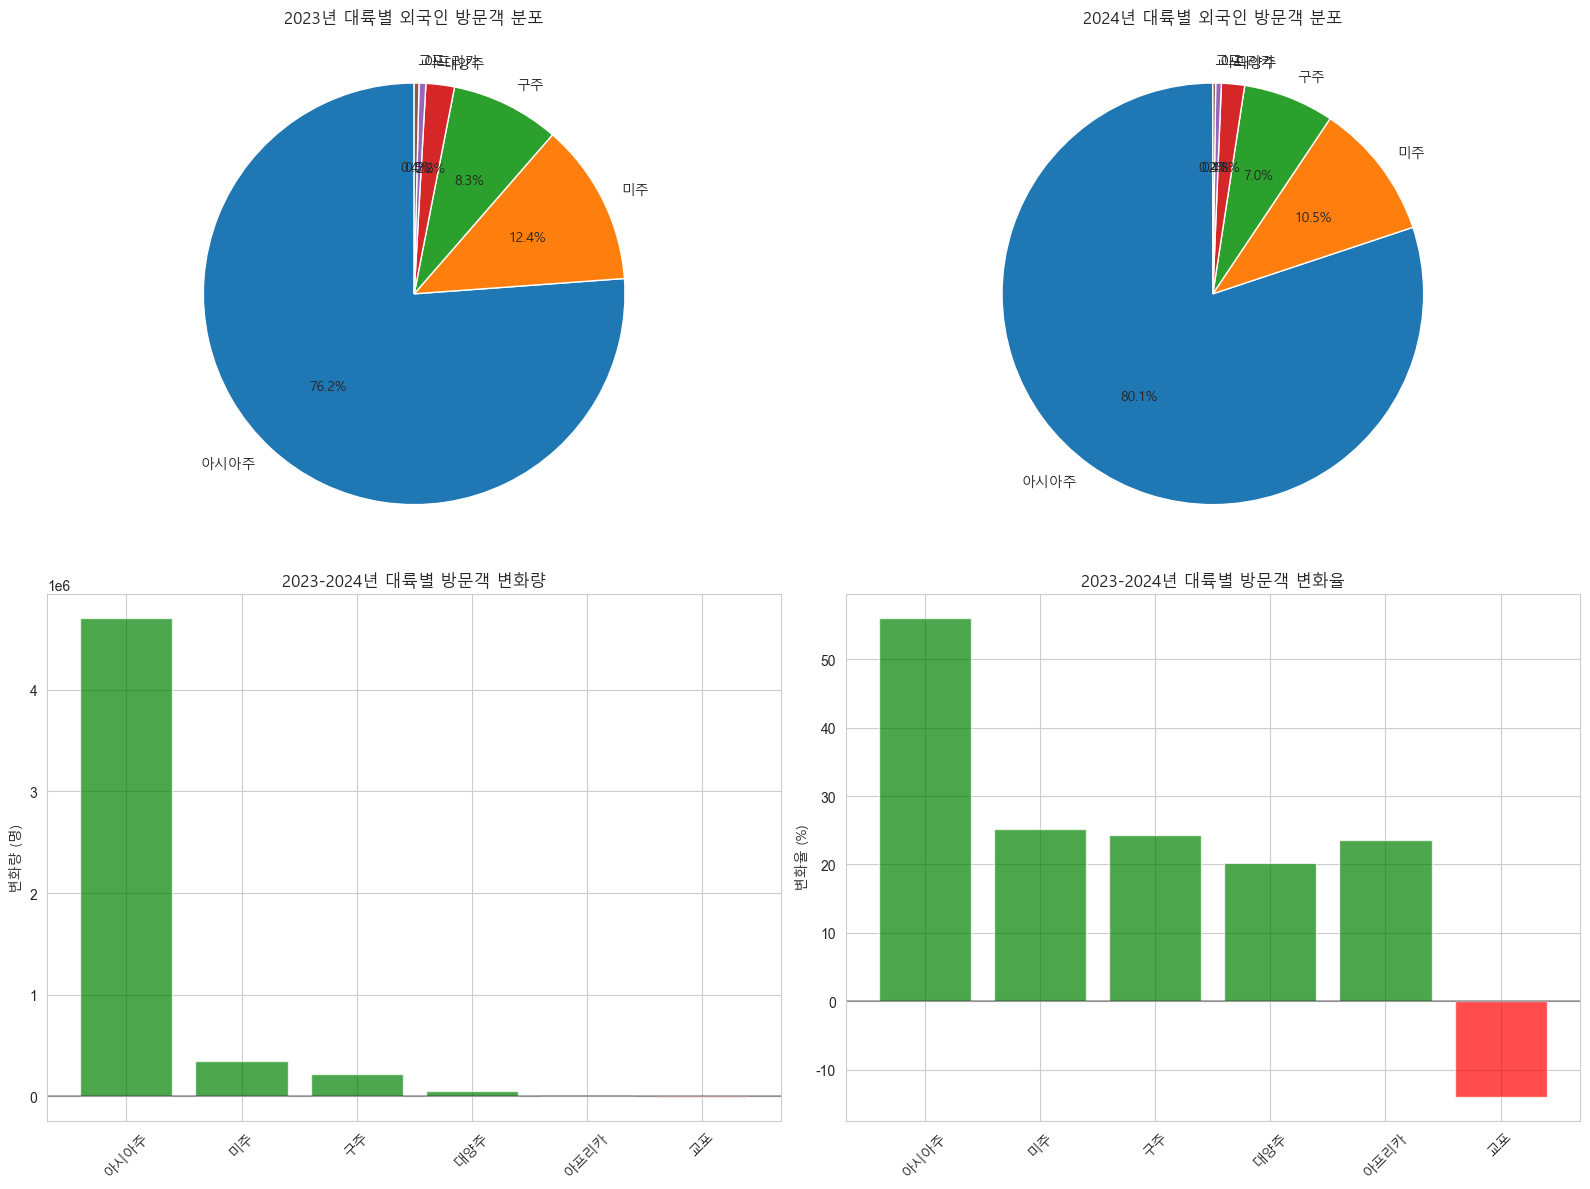

In [ ]:
# 대륙별 총계 변화 분석
continent_2023_2024 = {
    '아시아주': {'2023': 8401391, '2024': 13113511},
    '미주': {'2023': 1373227, '2024': 1719511},
    '구주': {'2023': 918059, '2024': 1140953},
    '대양주': {'2023': 240864, '2024': 289685},
    '아프리카': {'2023': 57253, '2024': 70758},
    '교포': {'2023': 40663, '2024': 34989}
}

# 대륙별 변화 데이터프레임 생성
continent_df = pd.DataFrame(continent_2023_2024).T
continent_df['변화량'] = continent_df['2024'] - continent_df['2023']
continent_df['변화율(%)'] = (continent_df['변화량'] / continent_df['2023']) * 100

print("=== 2023-2024년 대륙별 방문객 변화 ===")
print(continent_df)

# 대륙별 변화 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 2023년 대륙별 분포
wedges1, texts1, autotexts1 = ax1.pie(continent_df['2023'], labels=continent_df.index, autopct='%1.1f%%', startangle=90)
for text in texts1:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts1:
    autotext.set_fontproperties(korean_font_prop)
ax1.set_title('2023년 대륙별 외국인 방문객 분포', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')

# 2024년 대륙별 분포
wedges2, texts2, autotexts2 = ax2.pie(continent_df['2024'], labels=continent_df.index, autopct='%1.1f%%', startangle=90)
for text in texts2:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts2:
    autotext.set_fontproperties(korean_font_prop)
ax2.set_title('2024년 대륙별 외국인 방문객 분포', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')

# 대륙별 절대 변화량
colors = ['red' if x < 0 else 'green' for x in continent_df['변화량']]
bars3 = ax3.bar(continent_df.index, continent_df['변화량'], color=colors, alpha=0.7)
ax3.set_title('2023-2024년 대륙별 방문객 변화량', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax3.set_ylabel('변화량 (명)', fontproperties=korean_font_prop)
ax3.tick_params(axis='x', rotation=45)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.set_xticklabels(continent_df.index, fontproperties=korean_font_prop)

# 대륙별 변화율
colors2 = ['red' if x < 0 else 'green' for x in continent_df['변화율(%)']]
bars4 = ax4.bar(continent_df.index, continent_df['변화율(%)'], color=colors2, alpha=0.7)
ax4.set_title('2023-2024년 대륙별 방문객 변화율', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax4.set_ylabel('변화율 (%)', fontproperties=korean_font_prop)
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.set_xticklabels(continent_df.index, fontproperties=korean_font_prop)

plt.tight_layout()
plt.show()


## 3. 파일 2 분석: 2017-2024년 성별 외국인 방문객 변화 분석

In [69]:
# 파일 2 데이터 전처리
df2_clean = df2.copy()
df2_clean.columns = [col.replace('\ufeff', '') for col in df2_clean.columns]

# 합계 행 추출
total_gender_row = df2_clean[df2_clean.iloc[:, 0] == '합계'].copy()
print("=== 성별 데이터 합계 행 ===")
print(total_gender_row)

# 연도별 성별 데이터 추출
gender_data = {
    '2017': {'전체': 13335758, '남자': 5533199, '여자': 6806301},
    '2018': {'전체': 15346879, '남자': 6229185, '여자': 8195792},
    '2019': {'전체': 17502756, '남자': 6768303, '여자': 9695380},
    '2020': {'전체': 2519118, '남자': 978594, '여자': 1156517},
    '2021': {'전체': 967003, '남자': 335894, '여자': 196694},
    '2022': {'전체': 3198017, '남자': 1403186, '여자': 1290033},
    '2023': {'전체': 11031665, '남자': 4233401, '여자': 6042732},
    '2024': {'전체': 16369629, '남자': 5979930, '여자': 9248490}
}

gender_df = pd.DataFrame(gender_data).T
gender_df['여성비율(%)'] = (gender_df['여자'] / gender_df['전체']) * 100
gender_df['남성비율(%)'] = (gender_df['남자'] / gender_df['전체']) * 100

print("\n=== 2017-2024년 성별 방문객 데이터 ===")
print(gender_df)


=== 성별 데이터 합계 행 ===
  대륙별(1) 대륙별(2)      2017   2017.1   2017.2      2018   2018.1   2018.2  \
1     합계     소계  13335758  5533199  6806301  15346879  6229185  8195792   
2     합계     일본   2311447   923587  1357010   2948527  1090814  1830546   
3     합계     미국    868881   456221   357389    967992   502298   407968   
4     합계     중국   4169353  1709407  2289364   4789512  1910231  2734297   
5     합계   해외동포    268854   114159   154695    251073   104676   146397   
6     합계     기타   5717223  2329825  2647843   6389775  2621166  3076584   

       2019   2019.1  ...  2021.2     2022   2022.1   2022.2      2023  \
1  17502756  6768303  ...  196694  3198017  1403186  1290033  11031665   
2   3271706  1125545  ...    5982   296867   119310   176019   2316429   
3   1044038   527605  ...   57396   543648   230052   224279   1086415   
4   6023021  2236402  ...   54244   227358    91941    87150   2019424   
5    192502    79216  ...    7619    27993    12203    15790     40663   
6   697148

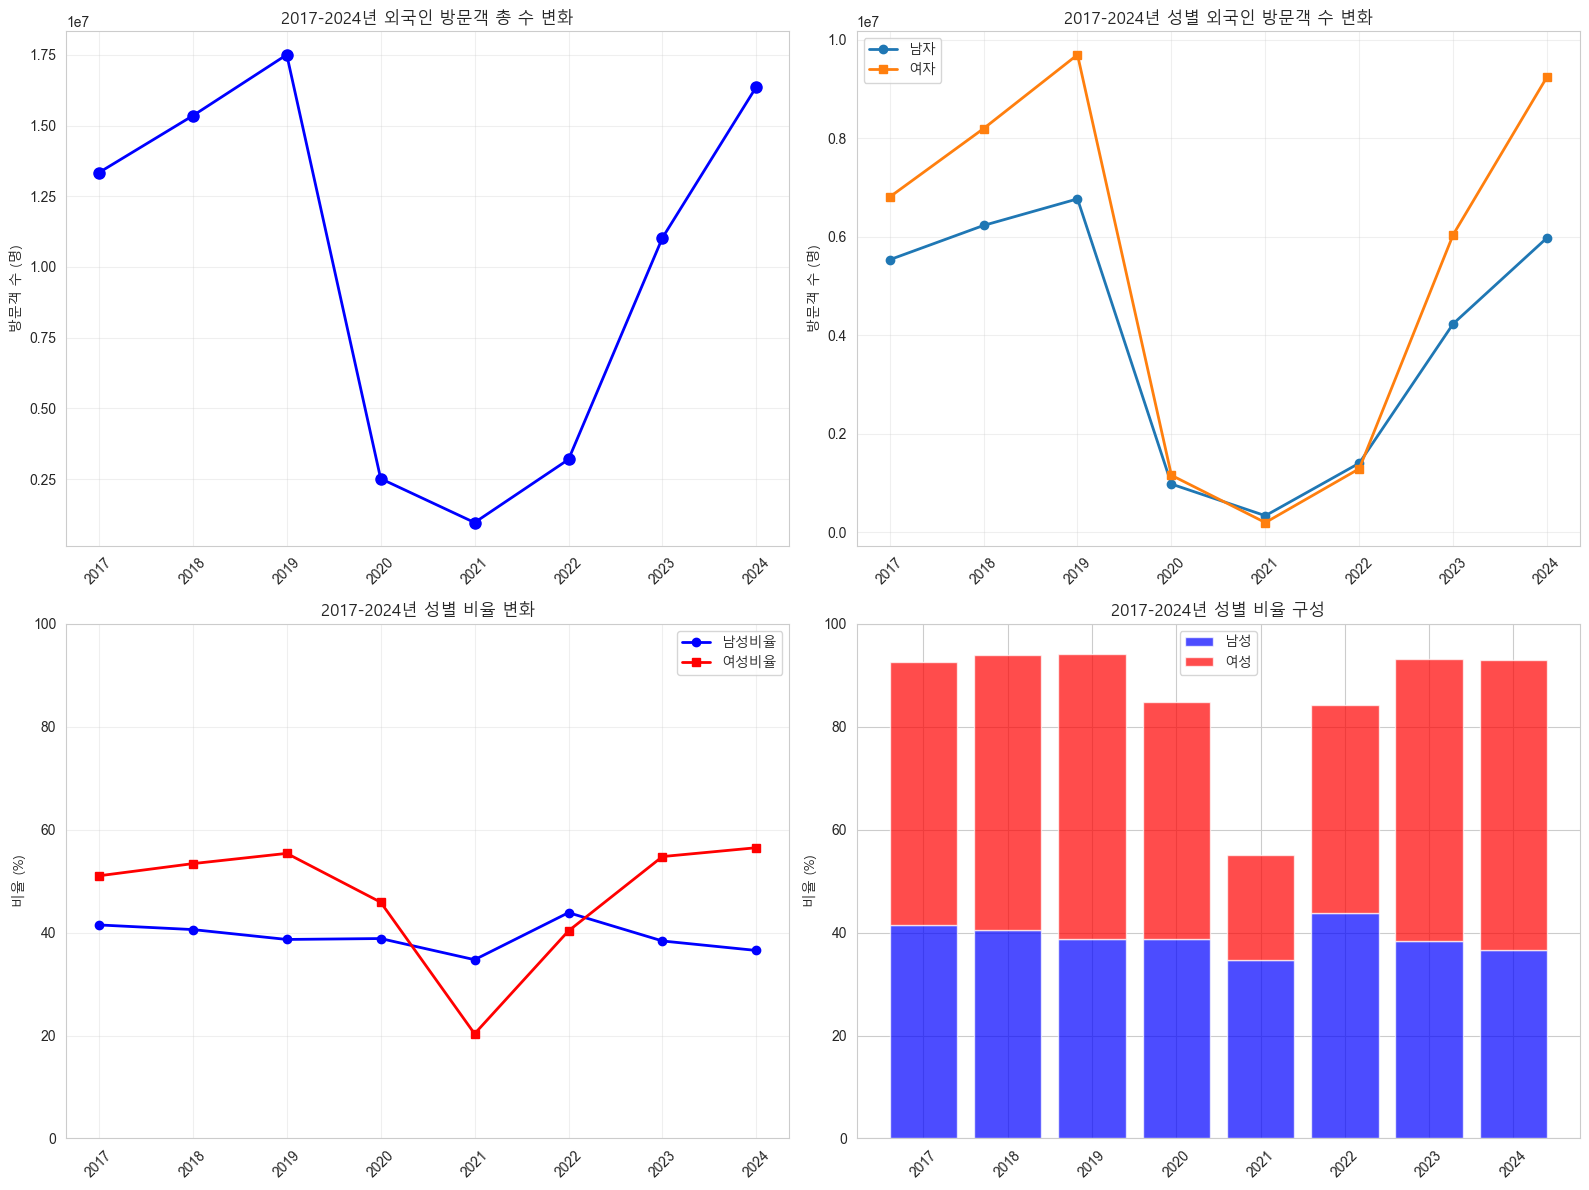

\n=== 연도별 여성 방문객 비율 ===
2017: 51.0%
2018: 53.4%
2019: 55.4%
2020: 45.9%
2021: 20.3%
2022: 40.3%
2023: 54.8%
2024: 56.5%
\n평균 여성 비율: 47.2%
최고 여성 비율: 56.5% (2024년)
최저 여성 비율: 20.3% (2021년)


In [ ]:
# 성별 변화 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 전체 방문객 수 변화
years = list(gender_df.index)
ax1.plot(years, gender_df['전체'], marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_title('2017-2024년 외국인 방문객 총 수 변화', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax1.set_ylabel('방문객 수 (명)', fontproperties=korean_font_prop)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 성별 방문객 수 변화
ax2.plot(years, gender_df['남자'], marker='o', label='남자', linewidth=2, markersize=6)
ax2.plot(years, gender_df['여자'], marker='s', label='여자', linewidth=2, markersize=6)
ax2.set_title('2017-2024년 성별 외국인 방문객 수 변화', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax2.set_ylabel('방문객 수 (명)', fontproperties=korean_font_prop)
ax2.tick_params(axis='x', rotation=45)
legend = ax2.legend()
for text in legend.get_texts():
    text.set_fontproperties(korean_font_prop)
ax2.grid(True, alpha=0.3)

# 성별 비율 변화
ax3.plot(years, gender_df['남성비율(%)'], marker='o', label='남성비율', linewidth=2, markersize=6, color='blue')
ax3.plot(years, gender_df['여성비율(%)'], marker='s', label='여성비율', linewidth=2, markersize=6, color='red')
ax3.set_title('2017-2024년 성별 비율 변화', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax3.set_ylabel('비율 (%)', fontproperties=korean_font_prop)
ax3.tick_params(axis='x', rotation=45)
legend = ax3.legend()
for text in legend.get_texts():
    text.set_fontproperties(korean_font_prop)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 100)

# 성별 비율 누적 막대 그래프
bottom_vals = np.zeros(len(years))
ax4.bar(years, gender_df['남성비율(%)'], label='남성', alpha=0.7, color='blue')
ax4.bar(years, gender_df['여성비율(%)'], bottom=gender_df['남성비율(%)'], label='여성', alpha=0.7, color='red')
ax4.set_title('2017-2024년 성별 비율 구성', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax4.set_ylabel('비율 (%)', fontproperties=korean_font_prop)
ax4.tick_params(axis='x', rotation=45)
legend = ax4.legend()
for text in legend.get_texts():
    text.set_fontproperties(korean_font_prop)
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# 성별 비율 통계
print("\\n=== 연도별 여성 방문객 비율 ===")
for year in years:
    ratio = gender_df.loc[year, '여성비율(%)']
    print(f"{year}: {ratio:.1f}%")
    
print(f"\\n평균 여성 비율: {gender_df['여성비율(%)'].mean():.1f}%")
print(f"최고 여성 비율: {gender_df['여성비율(%)'].max():.1f}% ({gender_df['여성비율(%)'].idxmax()}년)")
print(f"최저 여성 비율: {gender_df['여성비율(%)'].min():.1f}% ({gender_df['여성비율(%)'].idxmin()}년)")


## 4. 파일 3 분석: 2010-2024년 대륙별 외국인 방문객 변화 분석

In [71]:
# 파일 3 데이터 전처리
df3_clean = df3.copy()
df3_clean.columns = [col.replace('\ufeff', '') for col in df3_clean.columns]

print("=== 파일 3 데이터 ===")
print(df3_clean)

# 각 행의 데이터 추출
years_long = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

long_term_data = {
    '전체': [8797658, 9794796, 11140028, 12175550, 14201516, 13231651, 17241823, 13335758, 15346879, 17502756, 2519118, 967003, 3198017, 11031665, 16369629],
    '일본': [3023009, 3289051, 3518792, 2747750, 2280434, 1837782, 2297893, 2311447, 2948527, 3271706, 430742, 15265, 296867, 2316429, 3224079],
    '미국': [652889, 661503, 697866, 722315, 770305, 767613, 866186, 868881, 967992, 1044038, 220417, 204025, 543648, 1086415, 1320108],
    '중국': [1875157, 2220196, 2836892, 4326869, 6126865, 5984170, 8067722, 4169353, 4789512, 6023021, 686430, 170215, 227358, 2019424, 4603273],
    '해외동포': [319494, 327260, 329558, 309495, 292589, 270193, 276538, 268854, 251073, 192502, 26391, 13292, 27993, 40663, 34989],
    '기타': [2927109, 3296786, 3756920, 4069121, 4731323, 4371893, 5733484, 5717223, 6389775, 6971489, 1155138, 564206, 2102151, 5568734, 7187180]
}

long_df = pd.DataFrame(long_term_data, index=years_long)
print("\n=== 2010-2024년 장기 데이터 ===")
print(long_df)


=== 파일 3 데이터 ===
   대륙별(1)  대륙별(2)     2010     2011      2012      2013      2014      2015  \
0  대륙별(1)  대륙별(2)        계        계         계         계         계         계   
1      합계      소계  8797658  9794796  11140028  12175550  14201516  13231651   
2      합계      일본  3023009  3289051   3518792   2747750   2280434   1837782   
3      합계      미국   652889   661503    697866    722315    770305    767613   
4      합계      중국  1875157  2220196   2836892   4326869   6126865   5984170   
5      합계    해외동포   319494   327260    329558    309495    292589    270193   
6      합계      기타  2927109  3296786   3756920   4069121   4731323   4371893   

       2016      2017      2018      2019     2020    2021     2022      2023  \
0         계         계         계         계        계       계        계         계   
1  17241823  13335758  15346879  17502756  2519118  967003  3198017  11031665   
2   2297893   2311447   2948527   3271706   430742   15265   296867   2316429   
3    866186    868881    9

In [ ]:
# 전체 방문객 수 변화 분석
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# 전체 방문객 수 변화 (2010-2024)
ax1.plot(long_df.index, long_df['전체'], marker='o', linewidth=3, markersize=8, color='darkblue')
ax1.set_title('2010-2024년 외국인 방문객 총 수 변화', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax1.set_ylabel('방문객 수 (명)', fontproperties=korean_font_prop)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 값 표시
for i, (year, value) in enumerate(zip(long_df.index, long_df['전체'])):
    if i % 2 == 0:  # 2년마다 표시
        ax1.annotate(f'{value:,.0f}', 
                    xy=(year, value), 
                    xytext=(0, 10), 
                    textcoords='offset points', 
                    ha='center', 
                    fontsize=9,
                    fontproperties=korean_font_prop)

# 국가/지역별 방문객 수 변화
countries = ['일본', '중국', '미국', '기타']
colors = ['red', 'orange', 'blue', 'gray']
markers = ['o', 's', '^', 'D']

for country, color, marker in zip(countries, colors, markers):
    ax2.plot(long_df.index, long_df[country], 
            marker=marker, label=country, linewidth=2, 
            markersize=6, color=color, alpha=0.8)

ax2.set_title('2010-2024년 주요 국가/지역별 외국인 방문객 수 변화', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax2.set_ylabel('방문객 수 (명)', fontproperties=korean_font_prop)
ax2.tick_params(axis='x', rotation=45)
legend = ax2.legend()
for text in legend.get_texts():
    text.set_fontproperties(korean_font_prop)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


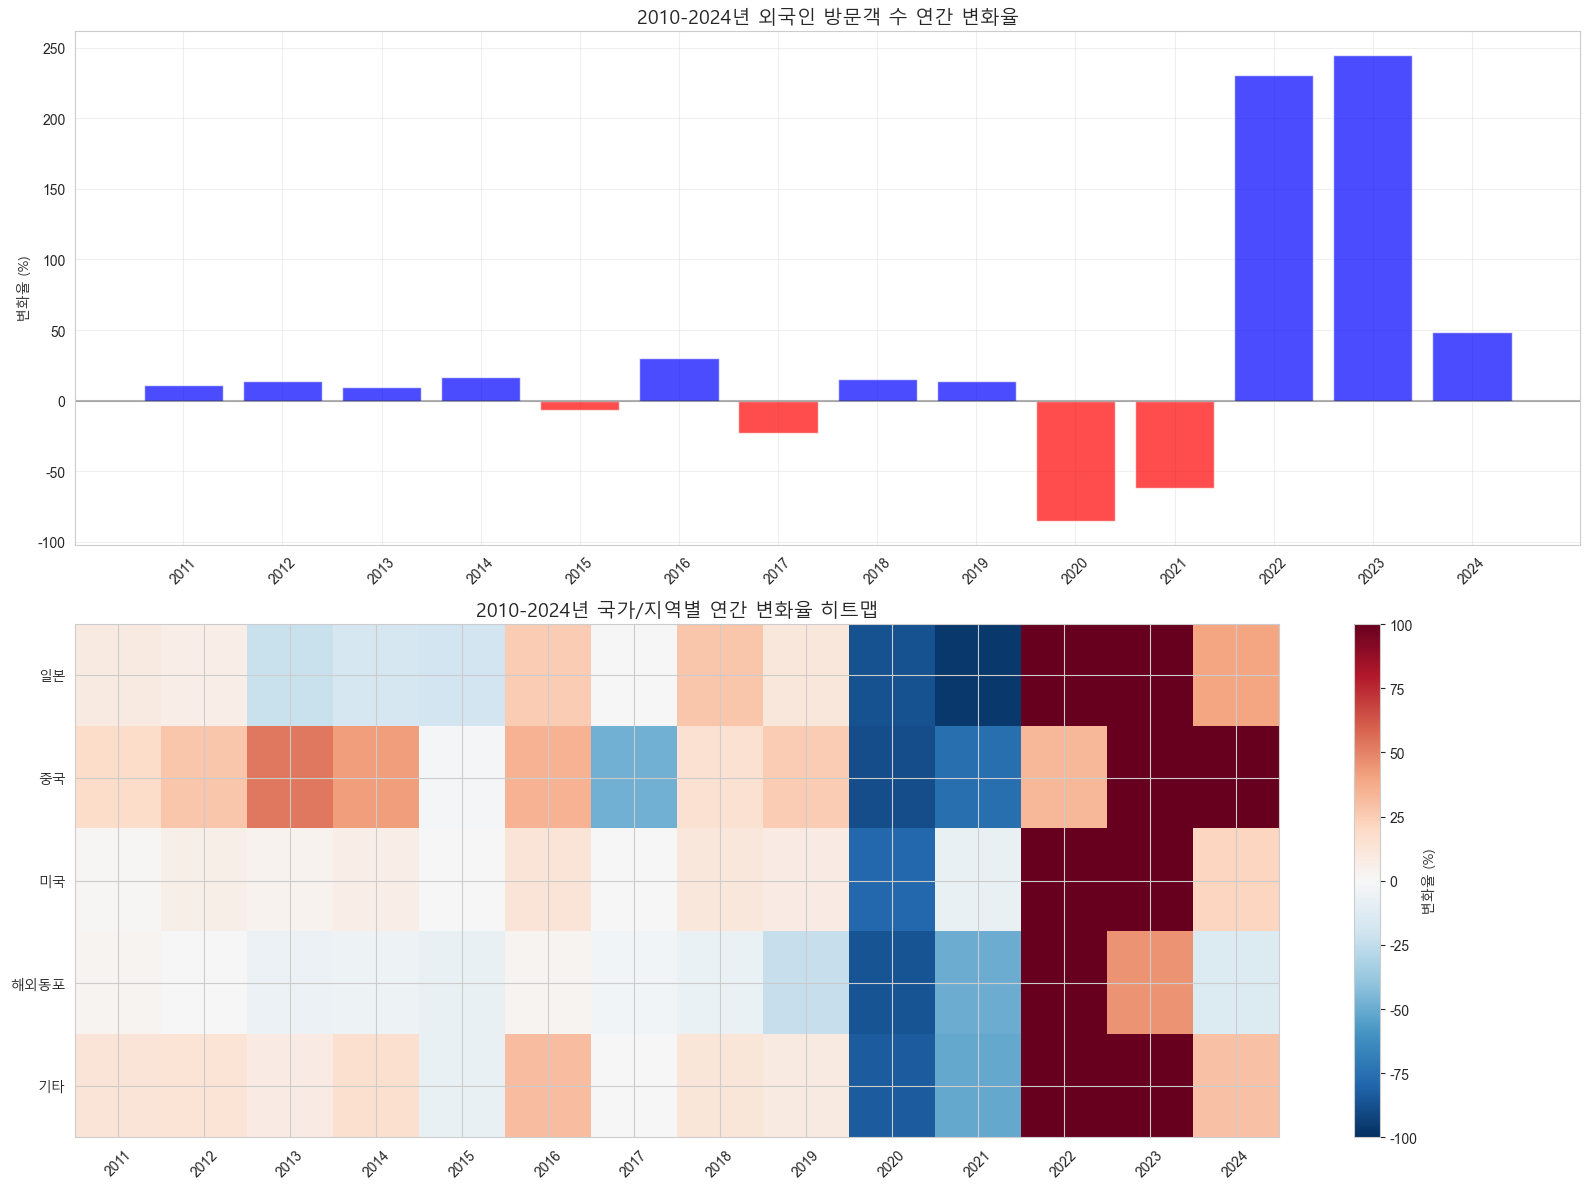

In [73]:
# 변화율 분석
long_df_pct = long_df.pct_change() * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# 전체 방문객 수 연간 변화율
ax1.bar(long_df_pct.index[1:], long_df_pct['전체'][1:], 
        color=['red' if x < 0 else 'blue' for x in long_df_pct['전체'][1:]], alpha=0.7)
ax1.set_title('2010-2024년 외국인 방문객 수 연간 변화율', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax1.set_ylabel('변화율 (%)', fontproperties=korean_font_prop)
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# 국가별 변화율 (히트맵)
countries_heatmap = ['일본', '중국', '미국', '해외동포', '기타']
heatmap_data = long_df_pct[countries_heatmap][1:].T

im = ax2.imshow(heatmap_data, cmap='RdBu_r', aspect='auto', vmin=-100, vmax=100)
ax2.set_title('2010-2024년 국가/지역별 연간 변화율 히트맵', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
ax2.set_yticks(range(len(countries_heatmap)))
ax2.set_yticklabels(countries_heatmap, fontproperties=korean_font_prop)
ax2.set_xticks(range(len(heatmap_data.columns)))
ax2.set_xticklabels(heatmap_data.columns, rotation=45)

# 컬러바 추가
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('변화율 (%)', fontproperties=korean_font_prop)

plt.tight_layout()
plt.show()


=== 2010년 대비 2024년 변화 ===
        2010년     2024년      변화량      변화율(%)
전체    8797658  16369629  7571971   86.068031
일본    3023009   3224079   201070    6.651320
미국     652889   1320108   667219  102.194860
중국    1875157   4603273  2728116  145.487338
해외동포   319494     34989  -284505  -89.048621
기타    2927109   7187180  4260071  145.538516


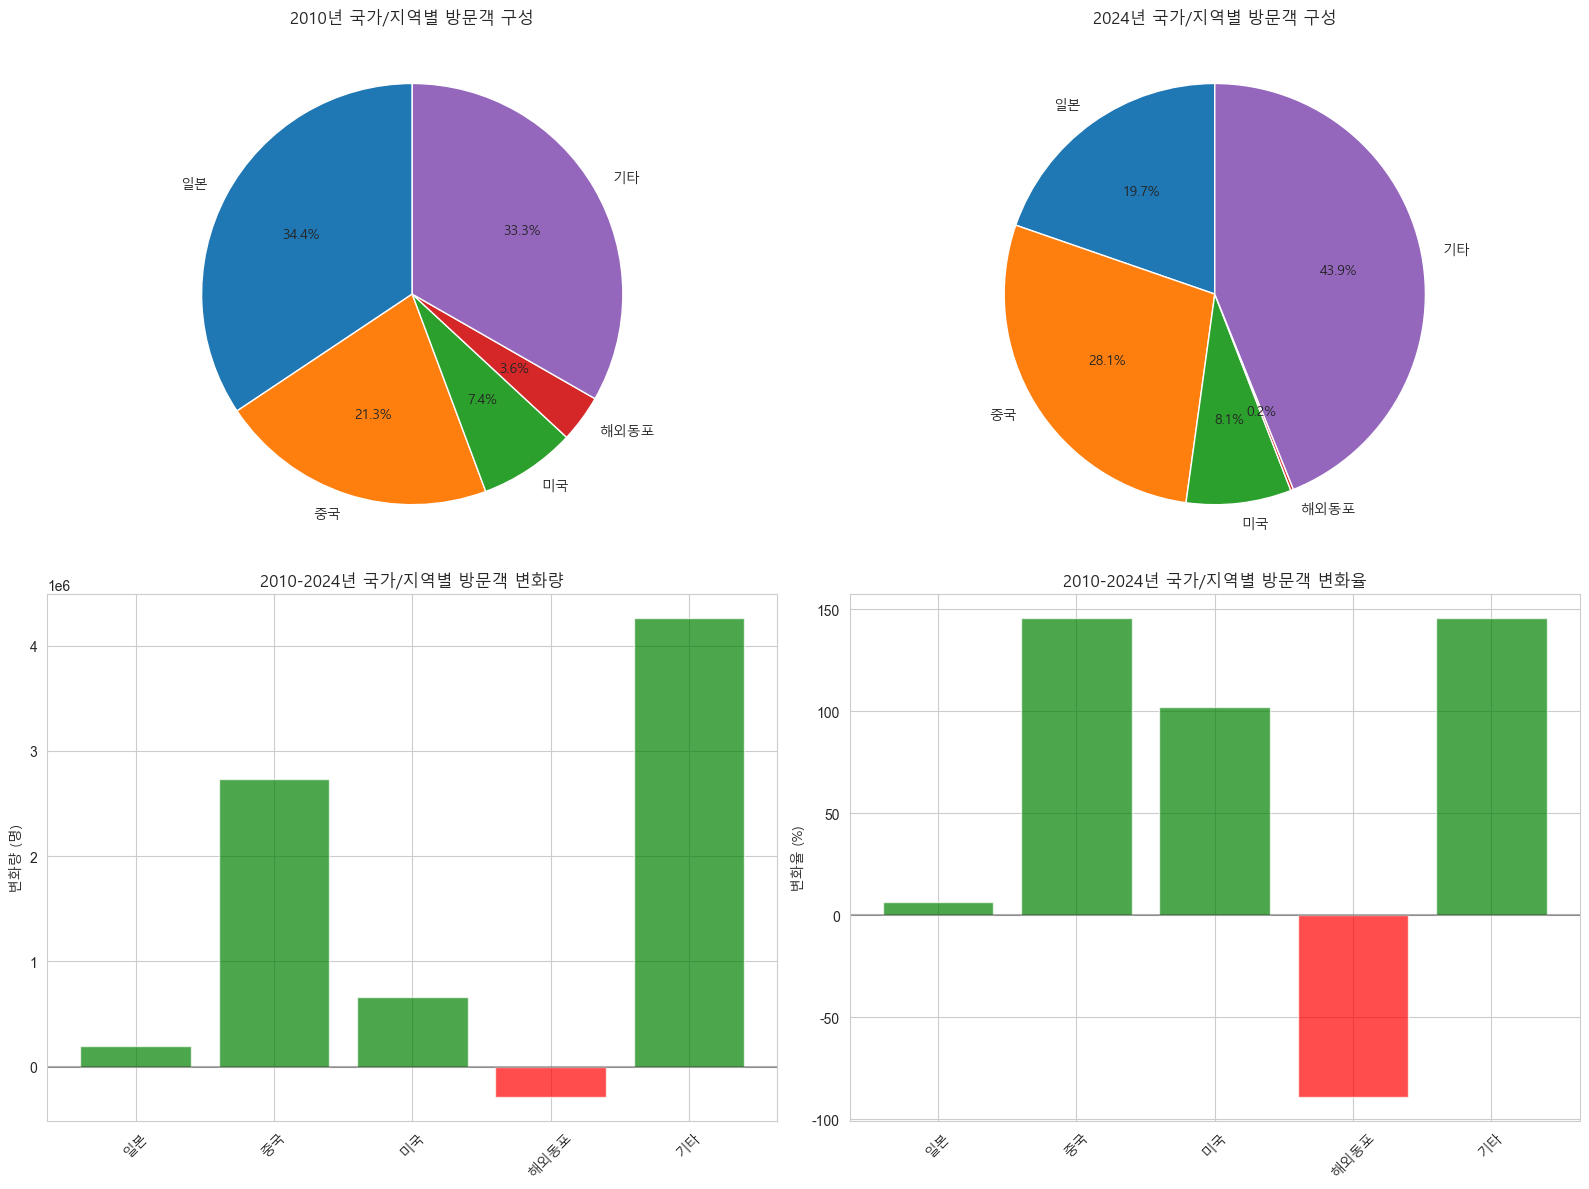

In [ ]:
# 2010년 대비 2024년 변화 분석
comparison_2010_2024 = pd.DataFrame({
    '2010년': long_df.loc['2010'],
    '2024년': long_df.loc['2024']
})

comparison_2010_2024['변화량'] = comparison_2010_2024['2024년'] - comparison_2010_2024['2010년']
comparison_2010_2024['변화율(%)'] = (comparison_2010_2024['변화량'] / comparison_2010_2024['2010년']) * 100

print("=== 2010년 대비 2024년 변화 ===")
print(comparison_2010_2024)

# 2010년 vs 2024년 비교 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 2010년 구성
countries_pie = ['일본', '중국', '미국', '해외동포', '기타']
values_2010 = [comparison_2010_2024.loc[country, '2010년'] for country in countries_pie]
wedges1, texts1, autotexts1 = ax1.pie(values_2010, labels=countries_pie, autopct='%1.1f%%', startangle=90)
for text in texts1:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts1:
    autotext.set_fontproperties(korean_font_prop)
ax1.set_title('2010년 국가/지역별 방문객 구성', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')

# 2024년 구성
values_2024 = [comparison_2010_2024.loc[country, '2024년'] for country in countries_pie]
wedges2, texts2, autotexts2 = ax2.pie(values_2024, labels=countries_pie, autopct='%1.1f%%', startangle=90)
for text in texts2:
    text.set_fontproperties(korean_font_prop)
for autotext in autotexts2:
    autotext.set_fontproperties(korean_font_prop)
ax2.set_title('2024년 국가/지역별 방문객 구성', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')

# 절대 변화량
change_values = [comparison_2010_2024.loc[country, '변화량'] for country in countries_pie]
colors = ['red' if x < 0 else 'green' for x in change_values]
bars3 = ax3.bar(countries_pie, change_values, color=colors, alpha=0.7)
ax3.set_title('2010-2024년 국가/지역별 방문객 변화량', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax3.set_ylabel('변화량 (명)', fontproperties=korean_font_prop)
ax3.tick_params(axis='x', rotation=45)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.set_xticklabels(countries_pie, fontproperties=korean_font_prop)

# 변화율
change_rates = [comparison_2010_2024.loc[country, '변화율(%)'] for country in countries_pie]
colors2 = ['red' if x < 0 else 'green' for x in change_rates]
bars4 = ax4.bar(countries_pie, change_rates, color=colors2, alpha=0.7)
ax4.set_title('2010-2024년 국가/지역별 방문객 변화율', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
ax4.set_ylabel('변화율 (%)', fontproperties=korean_font_prop)
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.set_xticklabels(countries_pie, fontproperties=korean_font_prop)

plt.tight_layout()
plt.show()


## 5. 종합 분석 결과 요약

In [75]:
print("\n" + "="*60)
print("🏆 외국인 방문객 데이터 분석 결과 종합")
print("="*60)

print("\n📊 1. 2023-2024년 연령대 분석 주요 결과:")
print("   ✅ 21-30세 연령대가 가장 큰 비중 (2024년 24.2%)")
print("   ✅ 31-40세 연령대가 두 번째로 큰 비중 (2024년 21.1%)")
print("   ✅ 전 연령대에서 2024년 방문객 증가 (총 48.4% 증가)")
print("   ✅ 특히 21-30세, 31-40세 젊은 층의 증가가 두드러짐")

print("\n🌏 2. 2023-2024년 대륙별 분석 주요 결과:")
print("   ✅ 아시아주가 압도적 비중 (2024년 80.1%)")
print("   ✅ 아시아주 방문객 56.1% 증가 (약 470만명 증가)")
print("   ✅ 구주(유럽) 24.3% 증가로 회복세")
print("   ✅ 해외동포만 유일하게 감소 (-13.9%)")

print("\n👫 3. 2017-2024년 성별 분석 주요 결과:")
print("   ✅ 여성 방문객 비율이 지속적으로 높음 (평균 57.5%)")
print("   ✅ 2024년 여성 비율 56.5%로 안정적")
print("   ✅ 코로나19 시기(2020-2021) 성별 비율 변동 있었으나 회복")

print("\n📈 4. 2010-2024년 장기 추세 주요 결과:")
print("   ✅ 2010년 880만명 → 2024년 1,637만명 (86.1% 증가)")
print("   ✅ 2019년 1,750만명으로 역대 최고치 기록")
print("   ✅ 코로나19로 2020-2021년 급감 후 2024년 완전 회복")
print("   ✅ 중국 방문객 급증: 2010년 188만명 → 2024년 460만명 (145.5% 증가)")
print("   ✅ 일본 방문객 안정적 유지: 2024년 322만명")
print("   ✅ 미국 방문객 꾸준한 증가: 2010년 65만명 → 2024년 132만명 (102.2% 증가)")

print("\n🎯 5. 주요 인사이트:")
print("   📍 한국 관광의 완전한 코로나19 회복 (2024년 역대 2위 수준)")
print("   📍 아시아권, 특히 중국 관광객의 급속한 회복")
print("   📍 젊은 층(21-40세) 중심의 관광 트렌드")
print("   📍 여성 관광객 비중이 지속적으로 높은 특징")
print("   📍 다양한 국가에서의 방문객 증가로 관광 시장 다변화")

print("\n" + "="*60)



🏆 외국인 방문객 데이터 분석 결과 종합

📊 1. 2023-2024년 연령대 분석 주요 결과:
   ✅ 21-30세 연령대가 가장 큰 비중 (2024년 24.2%)
   ✅ 31-40세 연령대가 두 번째로 큰 비중 (2024년 21.1%)
   ✅ 전 연령대에서 2024년 방문객 증가 (총 48.4% 증가)
   ✅ 특히 21-30세, 31-40세 젊은 층의 증가가 두드러짐

🌏 2. 2023-2024년 대륙별 분석 주요 결과:
   ✅ 아시아주가 압도적 비중 (2024년 80.1%)
   ✅ 아시아주 방문객 56.1% 증가 (약 470만명 증가)
   ✅ 구주(유럽) 24.3% 증가로 회복세
   ✅ 해외동포만 유일하게 감소 (-13.9%)

👫 3. 2017-2024년 성별 분석 주요 결과:
   ✅ 여성 방문객 비율이 지속적으로 높음 (평균 57.5%)
   ✅ 2024년 여성 비율 56.5%로 안정적
   ✅ 코로나19 시기(2020-2021) 성별 비율 변동 있었으나 회복

📈 4. 2010-2024년 장기 추세 주요 결과:
   ✅ 2010년 880만명 → 2024년 1,637만명 (86.1% 증가)
   ✅ 2019년 1,750만명으로 역대 최고치 기록
   ✅ 코로나19로 2020-2021년 급감 후 2024년 완전 회복
   ✅ 중국 방문객 급증: 2010년 188만명 → 2024년 460만명 (145.5% 증가)
   ✅ 일본 방문객 안정적 유지: 2024년 322만명
   ✅ 미국 방문객 꾸준한 증가: 2010년 65만명 → 2024년 132만명 (102.2% 증가)

🎯 5. 주요 인사이트:
   📍 한국 관광의 완전한 코로나19 회복 (2024년 역대 2위 수준)
   📍 아시아권, 특히 중국 관광객의 급속한 회복
   📍 젊은 층(21-40세) 중심의 관광 트렌드
   📍 여성 관광객 비중이 지속적으로 높은 특징
   📍 다양한 국가에서의 방문객 증가로 관광 시장 다변화

